# Regression relation of unemployment rate and VIX index

### Abstract: 
In this study, we explore the correlation between unemployment rate and VIX index. Monthly national unemployment rate are parsed from U.S. Bureau of Statistics (BLS) using a python library, BeautifulSoup, and VIX index data are downloaded from the Chicago Board of Exchange (CBOE) website. Through correlation analysis, we found the Pearson product moment correlation coefficient (or, Pearson coefficient for short) to be 0.15, which indicates a positive and weak correlation between the two parameters.

### Introduction:
U.S. national unemployment rate refers to people who do not have a job, have actively looked for work in prior 4 weeks, and are currently available for work, according to the [BLS](https://www.bls.gov/cps/cps_htgm.htm#unemployed). Financially, it can be interpreted as household income uncertainty. With increasing household income uncertainty (high unemployment rate), we hypothesize that individuals will attempt to protect their underlying assets through options purchase. A large scale options trading activities should trigger the rise of VIX index (also known as 'fear guage'), a measure of the stock market's expected volatility implied by S&P 500 index options. To test such hypothesis, we perform a correlation analysis to investigate the regression relation of the unemployment rate and VIX index. 

The workbook is ordered in the following way: We first present our data parsing/ cleaning process, then we perform a regression on the cleaned data and discuss our results. 

### Data selection/ cleaning:

We first parse all data from the unemployment section of the [BLS data page](https://www.bls.gov/data/). The code is shown below (They are within comment bracket to prevent re-downloading tens of gb of data everytime):

In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import os
import glob

'''
#data_label shows the data we are parsing from BLS website, 
#each element in the list stands for one row in the website. See content.txt
data_label = ['ln', 'la']                                                        

#remove all existing files in the directory
for f in glob.glob('*.txt'):                                                    
    os.remove(f)

#define parser function
def parser(var):
    url = 'https://download.bls.gov/pub/time.series/' + var + '/'
    #Connect to the URL
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    soup.findAll('a')

    # To download the whole data set, let's do a for loop through all a tags
    #'a' tags are for links
    for i in range(1, len(soup.findAll('a'))):                                                     
        one_a_tag = soup.findAll('a')[i]
        link = one_a_tag['href']
        if link == '/pub/time.series/la/maps/':
            pass
        else:
            download_url = 'https://download.bls.gov' + link
            #download data from download_url and save into a filename
            urllib.request.urlretrieve(download_url,link[link.find('/'+ var +'.') + 1:])
            #pause the code for a sec to prevent the website consider us as a scammer
            time.sleep(1)                                                                              
    return  

#define function to rename each file
def rename(data_label_shortcut):
    #rename all files and put them into .txt files
    files = glob.glob(data_label_shortcut +'*')                                                        
    for file in files:
        os.rename(file, file.replace('.','_') +'.txt')
    return

for p in range(0, len(data_label)):
    data_label_shortcut = data_label[p]
    parser(data_label_shortcut)
    rename(data_label_shortcut)
'''



'\n#data_label shows the data we are parsing from BLS website, \n#each element in the list stands for one row in the website. See content.txt\ndata_label = [\'ln\', \'la\']                                                        \n\n#remove all existing files in the directory\nfor f in glob.glob(\'*.txt\'):                                                    \n    os.remove(f)\n\n#define parser function\ndef parser(var):\n    url = \'https://download.bls.gov/pub/time.series/\' + var + \'/\'\n    #Connect to the URL\n    response = requests.get(url)\n    soup = BeautifulSoup(response.text, "html.parser")\n    soup.findAll(\'a\')\n\n    # To download the whole data set, let\'s do a for loop through all a tags\n    #\'a\' tags are for links\n    for i in range(1, len(soup.findAll(\'a\'))):                                                     \n        one_a_tag = soup.findAll(\'a\')[i]\n        link = one_a_tag[\'href\']\n        if link == \'/pub/time.series/la/maps/\':\n            pass\n 

We have now parsed the unemployment data from BLS. The monthly national unemployment rate is labelled with series_id LNS14000000 in the file ln_data_1_AllData.txt. The following code import the ln_data_1_AllData.txt file into the workbook, and build a dataframe with only the monthly national unemployment data (series_id: LNS14000000). 

In [2]:
import pandas as pd

#import all unemployment data and check the first 5 entires.
all_data = pd.read_csv('ln_data_1_AllData.txt', sep= '\t')
all_data.head()


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,series_id,year,period,value,footnote_codes
0,LNS10000000,1976,M01,154853,
1,LNS10000000,1976,M02,155066,
2,LNS10000000,1976,M03,155306,
3,LNS10000000,1976,M04,155529,
4,LNS10000000,1976,M05,155765,


In the table above, it is obvious that 'year' and 'period' corresponds to the date the 'value' was calculated/ measured. The 'value' refers to the resulting measurements of the series_id, which are clearly explained in 'ln_series.txt'. In the national unemployment data (series_id: LNS 14000000), we found that there is **space** between LNS and 14000000. Therefore, the following code is responsible for deleting such **space**, in order to prevent any potential disaster in later part of the work. Once they are removed, we read selected entires of series_id: LNS14000000 to ensure the correct label. 

In [3]:
#Found that the original series_id data entry comes with multiple white space, we perform the following command to eliminate
#these unesscessary whitespace
all_data.series_id = all_data['series_id'].str.replace(' ','')

unemployment_rate = all_data.loc[all_data.series_id == 'LNS14000000']
unemployment_rate.head()

,series_id,year,period,value,footnote_codes
415608,LNS14000000,1948,M01,3.4,
415609,LNS14000000,1948,M02,3.8,
415610,LNS14000000,1948,M03,4,
415611,LNS14000000,1948,M04,3.9,
415612,LNS14000000,1948,M05,3.5,


Next step is to build a python readable datetime entry. Although it is clear to us (human) that the above output belongs to period of January to May in 1948, they are simply strings for python. To make python understand them as a date, we first remove the M, which stands for month, in the 'period' column. Then, we used pd.to_datetime to convert the 'year' and 'period' strings into a date for python. The results are printed in the 'time' column.

In [4]:
unemployment_rate.period = unemployment_rate['period'].str.replace('M','')
unemployment_rate.period.unique()
unemployment_rate['time'] = pd.to_datetime(unemployment_rate['year'].astype(str)  + unemployment_rate['period'], format='%Y%m')
unemployment_rate.head()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,series_id,year,period,value,footnote_codes,time
415608,LNS14000000,1948,01,3.4,,1948-01-01
415609,LNS14000000,1948,02,3.8,,1948-02-01
415610,LNS14000000,1948,03,4,,1948-03-01
415611,LNS14000000,1948,04,3.9,,1948-04-01
415612,LNS14000000,1948,05,3.5,,1948-05-01


Now we have a cleaned data of monthly national unemployment rate and their corresponding period. Let's see how national unemployment rate changes (y-axis) over time (x-axis):

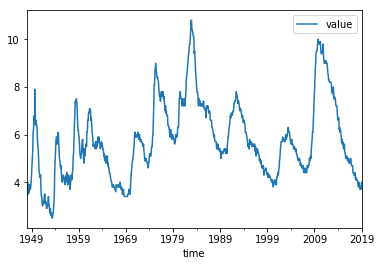

In [5]:
import matplotlib.pyplot as plt
unemployment_rate.plot.line(x='time', y='value')
plt.show()

### Observations and Discussions/ self comment:
It is interesting to note that unemployment rate peaks from time to time and this happens more often than I expected. The magnitudes of peaks vary as well. Although it is not the goal of this workbook to understand those peaks, __it will be interesting to perform further data cleaning to smooth the curve__, __identifying the location of peaks__ and __to check if the peaks happen at a fixed season/ quarter__. I will probably come back to this later. However, __an important conclusion about the unemployment rate vs. time is that there seems to be some kind of pattern in it__.

We now import the VIX index and concatenate them together.

In [6]:
VIX_1990to2003 = pd.read_excel('VIX_1990to2003.xlsx')
VIX_2004topresent = pd.read_csv('VIX_2004topresent.csv')

VIX_1990to2003.head()
VIX_2004topresent.head()

,Date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/2004,17.96,18.68,17.54,18.22
1,1/5/2004,18.45,18.49,17.44,17.49
2,1/6/2004,17.66,17.67,16.19,16.73
3,1/7/2004,16.72,16.75,15.50,15.50
4,1/8/2004,15.42,15.68,15.32,15.61


The following code converts the VIX.Date into python __datetime__ object and eliminate the __space__ in the column name. 

In [7]:
VIX = pd.concat([VIX_1990to2003, VIX_2004topresent])
VIX['time'] = pd.to_datetime(VIX['Date'])
VIX.rename(columns={'VIX Open':'VIX_Open', 'VIX High':'VIX_High', 'VIX Low':'VIX_Low', 'VIX Close':'VIX_Close'}, inplace=True)

print(VIX.head())
VIX.describe()

                  Date  VIX_Open  VIX_High  VIX_Low  VIX_Close       time
0  1990-01-02 00:00:00       NaN       NaN      NaN      17.24 1990-01-02
1  1990-01-03 00:00:00       NaN       NaN      NaN      18.19 1990-01-03
2  1990-01-04 00:00:00       NaN       NaN      NaN      19.22 1990-01-04
3  1990-01-05 00:00:00       NaN       NaN      NaN      20.11 1990-01-05
4  1990-01-08 00:00:00       NaN       NaN      NaN      20.26 1990-01-08


,VIX_Open,VIX_High,VIX_Low,VIX_Close
count,6804.000000,6804.000000,6804.000000,7309.000000
mean,19.234871,20.026748,18.508717,19.276623
std,8.049928,8.444113,7.587057,7.808619
min,9.010000,9.310000,8.560000,9.140000
25%,13.407500,14.007500,12.940000,13.580000
50%,17.120000,17.865000,16.490000,17.400000
75%,22.750000,23.560000,21.980000,22.690000
max,80.740000,89.530000,72.760000,80.860000


After re-organizing the data a little bit, we now plot VIX_Close vs. time.

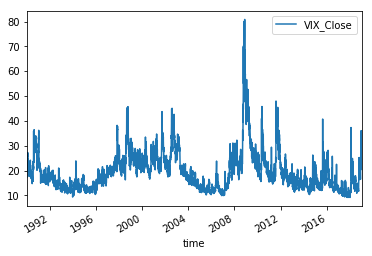

In [8]:
VIX.plot.line(x='time', y='VIX_Close')
plt.show()

The following selects the end of month VIX index and then it is plotted as a function of time.

In [9]:
VIX.set_index('time', inplace=True)
VIX = VIX.groupby(VIX.index.strftime('%Y-%m')).tail(1)
#need to becareful with the set index here

In [10]:
VIX.head(-20)

,Date,VIX_Open,VIX_High,VIX_Low,VIX_Close
time,,,,,
1990-01-31,1990-01-31 00:00:00,NaN,NaN,NaN,25.36
1990-02-28,1990-02-28 00:00:00,NaN,NaN,NaN,21.99
1990-03-30,1990-03-30 00:00:00,NaN,NaN,NaN,19.73
1990-04-30,1990-04-30 00:00:00,NaN,NaN,NaN,19.52
1990-05-31,1990-05-31 00:00:00,NaN,NaN,NaN,17.37
1990-06-29,1990-06-29 00:00:00,NaN,NaN,NaN,15.50
1990-07-31,1990-07-31 00:00:00,NaN,NaN,NaN,21.11
1990-08-31,1990-08-31 00:00:00,NaN,NaN,NaN,29.90
1990-09-28,1990-09-28 00:00:00,NaN,NaN,NaN,29.11


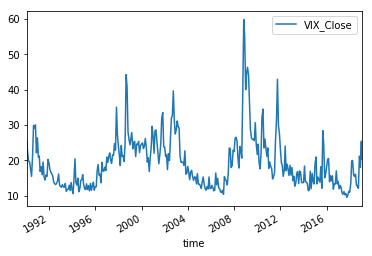

In [11]:
VIX.reset_index(inplace=True)
#VIX.head()
VIX.plot.line(x='time', y='VIX_Close')
plt.show()

The following aligns the unemployment rate data and the VIX index in terms of datetime:

In [30]:
#unemployment_rate.set_index('time', inplace=True)
unemployment_rate_after1990 = unemployment_rate.loc['1990-01-01':'2018-12-01']
unemployment_rate_after1990.reset_index(inplace=True)
unemployment_rate_after1990.head()


fig, ax = plt.subplots()
ax2 = ax.twinx()

unemployment_rate_after1990.plot(x='time', y='value', ax=ax)
VIX.plot(x='time', y='VIX_Close', ax=ax2, ls="--")

#plt.show()
plt.savefig('VIXclose_unemployment_overlap.jpeg')


In [17]:
VIX.describe()

,VIX_Open,VIX_High,VIX_Low,VIX_Close
count,325.000000,325.000000,325.000000,349.000000
mean,19.084954,19.901631,18.424615,19.315129
std,7.653036,7.881144,7.197981,7.429689
min,9.590000,9.830000,9.360000,9.510000
25%,13.430000,14.030000,12.970000,13.680000
50%,17.230000,17.690000,16.550000,17.400000
75%,22.940000,23.880000,22.330000,23.380000
max,62.930000,65.850000,56.730000,59.890000


In [18]:
VIX=VIX.iloc[:-1]
VIX.describe()

,VIX_Open,VIX_High,VIX_Low,VIX_Close
count,324.000000,324.000000,324.000000,348.000000
mean,19.079167,19.895062,18.419475,19.311810
std,7.664161,7.892444,7.208517,7.440128
min,9.590000,9.830000,9.360000,9.510000
25%,13.420000,14.027500,12.965000,13.655000
50%,17.220000,17.660000,16.480000,17.400000
75%,22.945000,23.892500,22.345000,23.385000
max,62.930000,65.850000,56.730000,59.890000


In [19]:
unemployment_rate_after1990 = unemployment_rate_after1990.iloc[1:]

In [20]:
unemployment_rate_after1990.describe()

,year
count,347.000000
mean,2004.040346
std,8.356825
min,1990.000000
25%,1997.000000
50%,2004.000000
75%,2011.000000
max,2018.000000


In [21]:
unemployment_and_VIX = pd.DataFrame({'unemployment_rate':unemployment_rate_after1990.value, 'VIX_Close':VIX.VIX_Close})

In [22]:
unemployment_and_VIX.head()

,unemployment_rate,VIX_Close
0,NaN,25.36
1,5.3,21.99
2,5.2,19.73
3,5.4,19.52
4,5.4,17.37


After organizing everything, let's see how their data distribution correlate to each other.

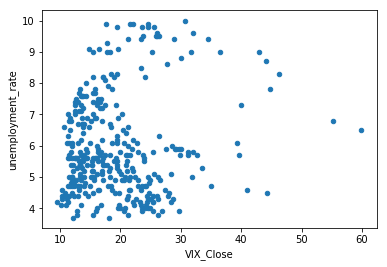

In [23]:
unemployment_and_VIX.unemployment_rate = pd.to_numeric(unemployment_and_VIX.unemployment_rate)
unemployment_and_VIX.plot.scatter(x='VIX_Close', y='unemployment_rate')

plt.show()

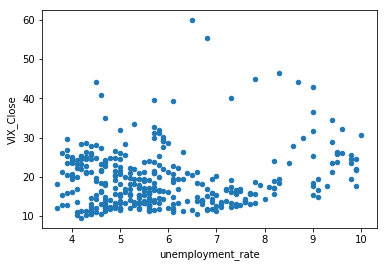

In [24]:
unemployment_and_VIX.plot.scatter(x='unemployment_rate', y='VIX_Close')
plt.show()

Using Seaborn to visualize the distribution and correlations together with a bar plot of data distribution.

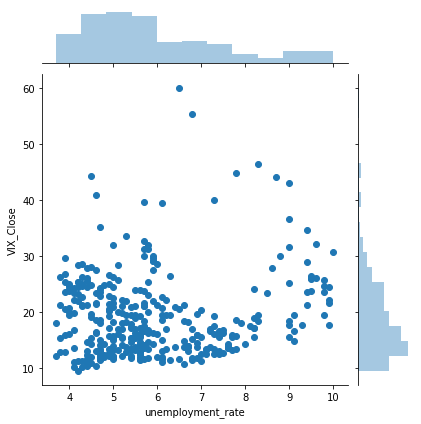

In [28]:
import seaborn as sns
sns_pairplot = sns.jointplot(x='unemployment_rate', y='VIX_Close', data=unemployment_and_VIX)
plt.show()
sns_pairplot.savefig("VIXclose_vs_nationalunemploymentrate.jpeg")

By bar plots, we see that data seem to be highly skewed and most data are distributed at the lower values of both axis. This should be expected since economic crises  do not happen often.